# Assignment 5.1

## 1.0.1   Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# import data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# No word should exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [6]:
# decoding reviews back to their text

# dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# reverse it by mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decode the review - indices are offset by 3 because 0, 1, 2 are reserved, indices for "padding", "start of sequence" and "unknown"
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# prepare the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# vectorize labels so they can be fed into a neural network
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
# Keras implementation
from keras import models
from keras import layers

In [12]:
# build the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# compiling the model
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [14]:
from keras import optimizers

In [15]:
# configuring the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [16]:
# using custom losses & metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

In [17]:
# validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5015 - binary_accuracy: 0.7805 - val_loss: 0.3704 - val_binary_accuracy: 0.8735
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2953 - binary_accuracy: 0.9064 - val_loss: 0.3131 - val_binary_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2176 - binary_accuracy: 0.9287 - val_loss: 0.2785 - val_binary_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1718 - binary_accuracy: 0.9448 - val_loss: 0.2860 - val_binary_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1423 - binary_accuracy: 0.9543 - val_loss: 0.2872 - val_binary_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1150 - binary_accuracy: 0.9665 - val_loss: 0.3069 - val_binary_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

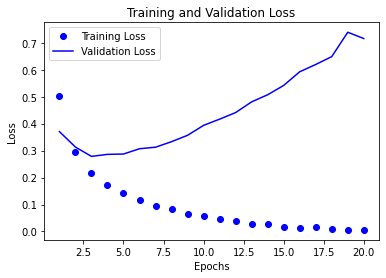

In [20]:
# plot training & validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict["binary_accuracy"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

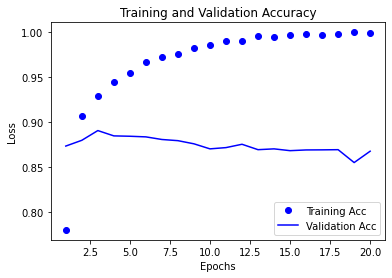

In [21]:
# plot training & validation accuracy
plt.clf() # clears figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5153 - accuracy: 0.7828
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.3003 - accuracy: 0.9066
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2181 - accuracy: 0.9271
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2889 - accuracy: 0.8858


In [23]:
# view results
results

[0.2889421582221985, 0.8858399987220764]

In [24]:
# predict with model
model.predict(x_test)

array([[0.2081638 ],
       [0.99562436],
       [0.86532116],
       ...,
       [0.16729161],
       [0.06938234],
       [0.5782353 ]], dtype=float32)

# Assignment 5.2

## 1.0.1 Implement the news classifier found in section 3.5 of Deep Learning with Python.

In [25]:
import keras

In [26]:
from keras.datasets import reuters

In [27]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [28]:
len(train_data)

8982

In [29]:
len(test_data)

2246

In [30]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [31]:
# decode back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [32]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [33]:
# prepare the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
# one hot encode
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [35]:
from keras.utils.np_utils import to_categorical

In [36]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [37]:
# Build the model
from keras import models, layers

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape = (10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [39]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [40]:
# validate approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
# train the network for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 23ms/step - loss: 2.7810 - accuracy: 0.5150 - val_loss: 1.8202 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4707 - accuracy: 0.7041 - val_loss: 1.3203 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0729 - accuracy: 0.7727 - val_loss: 1.1329 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8464 - accuracy: 0.8244 - val_loss: 1.0268 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6758 - accuracy: 0.8562 - val_loss: 0.9765 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5411 - accuracy: 0.8869 - val_loss: 0.9449 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4359 - accuracy: 0.9105 - val_loss: 0.8873 - val_accuracy: 0.8100
Epoch 8/20
16

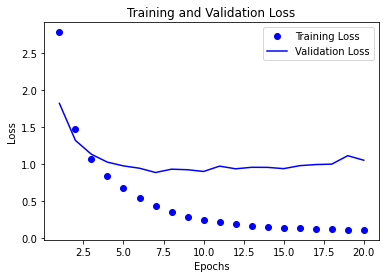

In [42]:
# display loss & accuracy plots
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

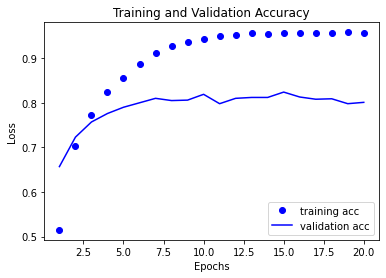

In [43]:
plt.clf() # clear figure
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = "training acc")
plt.plot(epochs, val_acc, 'b', label = "validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# retrain model from scratch
model = models.Sequential([
  layers.Dense(64, activation="relu", input_shape = (10000,)),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 25ms/step - loss: 2.5708 - accuracy: 0.5327 - val_loss: 1.7150 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.3807 - accuracy: 0.7115 - val_loss: 1.2966 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0260 - accuracy: 0.7819 - val_loss: 1.1406 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8056 - accuracy: 0.8317 - val_loss: 1.0263 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6386 - accuracy: 0.8622 - val_loss: 0.9632 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5114 - accuracy: 0.8916 - val_loss: 0.9114 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4068 - accuracy: 0.9136 - val_loss: 0.9183 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [45]:
results

[0.9904041886329651, 0.7862867116928101]

In [46]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) /len(test_labels)

0.18432769367764915

In [47]:
predictions = model.predict(x_test)

In [48]:
predictions[0].shape

(46,)

In [49]:
# each entry in predictions is a vector of length 46

In [50]:
np.sum(predictions[0])

1.0

In [51]:
# the coefficients in the vector sum to 1

In [52]:
np.argmax(predictions[0])

3

In [53]:
# different way to handle labels & the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [54]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.9545 - accuracy: 0.4377 - val_loss: 2.2940 - val_accuracy: 0.5440
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.8669 - accuracy: 0.5811 - val_loss: 1.7047 - val_accuracy: 0.5990
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.4180 - accuracy: 0.6596 - val_loss: 1.5177 - val_accuracy: 0.6570
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2196 - accuracy: 0.6912 - val_loss: 1.4587 - val_accuracy: 0.6490
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0952 - accuracy: 0.7140 - val_loss: 1.3867 - val_accuracy: 0.6690
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9957 - accuracy: 0.7348 - val_loss: 1.3890 - val_accuracy: 0.6860
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9124 - accuracy: 0.7595 - val_loss: 1.3815 - val_accuracy: 0.6860
Epoch 8/20
63/63 [=

In [56]:
# ~70% accuracy
# ~ 9% drop due to compressing a lot of info

# Assignment 5.3

## 1.0.1 Implement the housing price regression model found in section 3.6 of Deep Learning with Python.

In [57]:
from keras.datasets import boston_housing

In [58]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [59]:
train_data.shape

(404, 13)

In [60]:
test_data.shape

(102, 13)

In [61]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [62]:
# prepare data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [63]:
# build model
from keras import models, layers

In [65]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [66]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [67]:
all_scores

[1.9824161529541016, 2.5980234146118164, 2.496790647506714, 2.3545424938201904]

In [68]:
np.mean(all_scores)

2.3579431772232056

In [69]:
# save validation logs for each fold
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [70]:
# compute average of the per-epoch MAE scores for all folds
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

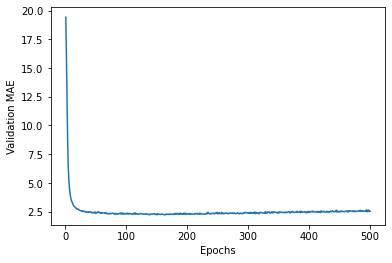

In [71]:
# plot validation scores
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [73]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

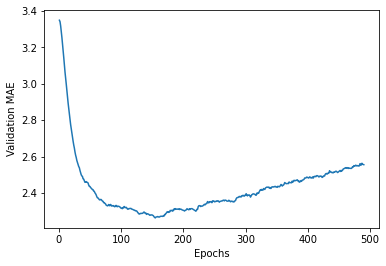

In [74]:
# plot validation scores but excluding first 10 data points
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [75]:
# train the model
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 930us/step - loss: 18.3195 - mae: 2.6116


In [76]:
test_mae_score

2.611565351486206

In [ ]:
# still off by about -$2.611